# CNN을 이용한 이미지 분류 
실전데이터로 수행하기 

In [2]:
from PIL import Image 
import numpy as np 

## chair, laptop의 이미지 해상도 통일하기 

### 해상도 통일 적용 Test 

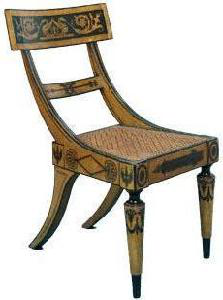

In [3]:
# Image 불러오기 
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [4]:
# 해상도 (배열값) 확인 
np.array(img).shape

(300, 223, 3)

> (세로, 가로, rgb)

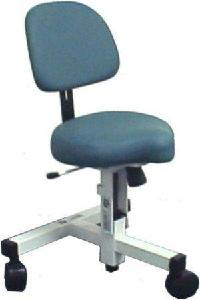

In [5]:
# 다른 이미지 확인 
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [6]:
# 해상도 (배열값) 확인 
np.array(img).shape

(300, 200, 3)

In [7]:
# 너비 해상도 구하기 : shape 튜플의 2번 
np.array(img).shape[1]

200

### chair 전체 이미지 해상도 평균 구하기 

In [8]:
import glob 

In [9]:
widthRatio = [] # chair 들의 너비 담을 리스트 
heightRatio = [] # chair 들의 높이 담을 리스트 

for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    # print(img.shape[1])
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [10]:
print("chair 너비 평균 해상도 : ", np.max(widthRatio))
print("chair 높이 평균 해상도 : ", np.max(heightRatio))

chair 너비 평균 해상도 :  300
chair 높이 평균 해상도 :  300


In [11]:
np.zeros([100,500])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
img.shape

(222, 300, 3)

In [13]:

def add_padding(filename, size):
    count = 0
    data =np.zeros([60,size,size])
    for file in sorted(glob.glob('../Data/cnn/%s/*.jpg'%filename)):
        
        temp_file = (Image.open(file))
        temp_file = temp_file.convert('L')
        img = np.array(temp_file,dtype=np.int32)
        # img = np.array(Image.open(file), dtype=np.int32)
        width = img.shape[1]
        height = img.shape[0]
        leftwidth = (size - width)//2
        upperheight = (size - height)//2
        
        up = np.zeros([upperheight,size])
        middle = np.concatenate( [np.zeros([height,leftwidth]), img, np.zeros([height,(size-leftwidth-width)])] ,axis=1  )
        down = np.zeros([size-upperheight-height,size])
        if (count >=60):
            return data
        data[count,:,:] = np.concatenate([up,middle,down],axis = 0)
        count+=1
    return data
    

In [14]:
chair = add_padding('chair',350)
laptop = add_padding('laptop',350)
piano = add_padding('piano',350)

data = np.concatenate([chair,laptop,piano])

In [15]:
data = data/255.0

In [16]:
test = np.concatenate([np.zeros(60),np.ones(60),np.full(60,2)])

In [17]:
data= data.reshape(180,350,350,1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(data,test, test_size= 0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [19]:
data.max()

1.0

In [17]:
np.concatenate([np.zeros([1,3]),np.ones([1,3])],axis=1)

array([[0., 0., 0., 1., 1., 1.]])

In [180]:
# 갯수 확인 
len(widthRatio) == len(heightRatio)

True

> 이상 없이 다 들어옴!      
> 너비 231, 높이 297로 정함 

### chair의 이미지 해상도 변경 및 Gray Scale 적용하기 

In [11]:
# Chair 62개 gray scale 변경하고 60개로 맞추기 
i = 0 
for file in sorted(glob.glob("../Data/cnn/chair/*jpg")):
    img = Image.open(file)
    imgResize = img.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘 
    imgResize = imgResize.convert('L') # gray scale로 변환. 투명도가 있는 이미지의 경우 'LA'라고 쓴다. 
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i, 'JPEG')
    i += 1 
    if i >= 60:
        break

/var/folders/t8/fgx0kt2j66zf6nrrj6v3_t9w0000gn/T/ipykernel_20490/699883059.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgResize = img.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘


### laptop의 이미지 해상도 변경 및 Gray Scale 적용하기 

In [12]:
# Laptop 81개를 gray scale 변경하고 60개로 맞추기 
i = 0 
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘 
    imgResize = imgResize.convert('L') # gray scale로 변환. 투명도가 있는 이미지의 경우 'LA'라고 쓴다. 
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i, 'JPEG')
    i += 1 
    if i >= 60:
        break

/var/folders/t8/fgx0kt2j66zf6nrrj6v3_t9w0000gn/T/ipykernel_20490/3230743017.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgResize = img.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘


--- 
## 이미지 데이터 numpy로 변경하기

### chair

In [13]:
# chair 이미지 데이터 -> numpy 배열 변경하기 
number_of_data = 60
img_width_size = 231
img_height_size = 297

In [14]:
# 검은 화면 하나를 만들자 
# - np 배열은 미리 0값으로 채워주고 값을 변경해서 씀 
# - 검은 화면 하나 만들어놓고 색(흑백) 넣어준다고 생각하면 됨 
chairData = np.zeros(number_of_data*img_width_size*img_height_size, dtype = np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [15]:
chairData.shape

(60, 297, 231)

In [16]:
i = 0 
for file in sorted(glob.glob('../Data/cnn/chairNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i += 1

In [17]:
chairData.shape

(60, 297, 231)

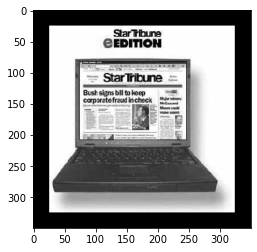

In [87]:
# 이미지 확인하기 
import matplotlib.pyplot as plt 

plt.imshow(data[110].reshape(350,350), cmap='gray')
plt.show()

### laptop 

In [19]:
laptopData = np.zeros(number_of_data*img_width_size*img_height_size, dtype = np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [20]:
i = 0 
for file in sorted(glob.glob('../Data/cnn/laptopNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i,:,:] = img
    i += 1

In [21]:
laptopData.shape

(60, 297, 231)

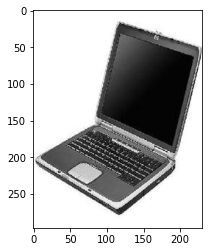

In [22]:
# 이미지 확인하기 
import matplotlib.pyplot as plt 

plt.imshow(laptopData[0].reshape(297,231), cmap='gray')
plt.show()

--- 
## numpy 데이터 data 합치기 (chair, laptop)

### train data 

In [122]:
train = np.concatenate([chairData, laptopData])
train.shape

NameError: name 'chairData' is not defined

### target data 

In [123]:
target = np.concatenate([np.zeros(60), np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

--- 
## DL 

### data split

In [124]:
# train / test / val 분리 
trainData = train.reshape(-1, 297, 231, 1) / 255.0

NameError: name 'train' is not defined

In [125]:
trainData.shape

NameError: name 'trainData' is not defined

In [126]:
from sklearn.model_selection import train_test_split
trainData, testData, trainTarget, testTarget = train_test_split(
    trainData, target, test_size = 0.2, random_state = 42
)
trainData, valData, trainTarget, valTarget = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=42
)

NameError: name 'trainData' is not defined

In [127]:
print(trainData.shape)
print(trainTarget.shape)
print(valData.shape)
print(valTarget.shape)
print(testData.shape)
print(testTarget)

NameError: name 'trainData' is not defined

### cnn model 

In [20]:
# 모델 도화지 
from tensorflow import keras 
model = keras.Sequential()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-21 19:16:53.599200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 19:16:53.599290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
# 필터 32개 Conv2D
model.add(
    keras.layers.Conv2D(
        64, # 필터 32개
        kernel_size = 3, # 필터 커널 3x3
        activation = 'relu', # af 지정 
        padding = 'same', # 패딩 옵션
        input_shape = (350,350,1) # 입력 데이터 모양 
    )
)
# max pooling 
model.add(
    keras.layers.MaxPooling2D(2)
)
# model.add(
#     keras.layers.Conv2D(
#         256, # 필터 32개
#         kernel_size = 5, # 필터 커널 3x3
#         activation = 'relu', # af 지정 
#         padding = 'same', # 패딩 옵션
#         input_shape = (350,350,1) # 입력 데이터 모양 
#     )
# )
# # max pooling 
# model.add(
#     keras.layers.MaxPooling2D(3)
# )

### DL model 

In [22]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 128)    0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3920000)           0         
                                                                 
 dense (Dense)               (None, 100)               392000100 
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                        

### compile and fit 

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model_chairlaptop.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) 

history = model.fit(
    X_train, 
    y_train, 
    epochs = 20,
    # validation_data = (X_val, y_val), 
    # callbacks = [checkpoint_cb, early_stopping_cb]
    )

Epoch 1/20


2022-07-21 19:16:54.909659: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-21 19:16:55.216072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 34.6580 - accuracy: 0.4261 

2022-07-21 19:17:47.870489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 85s 24s/step - loss: 34.6580 - accuracy: 0.4261 - val_loss: 27.8949 - val_accuracy: 0.5862
Epoch 2/20
4/4 [==============================] - 93s 25s/step - loss: 49.7174 - accuracy: 0.4609 - val_loss: 25.5188 - val_accuracy: 0.6552
Epoch 3/20
2/4 [==============>...............] - ETA: 31s - loss: 28.4984 - accuracy: 0.5781

### 결과 확인 

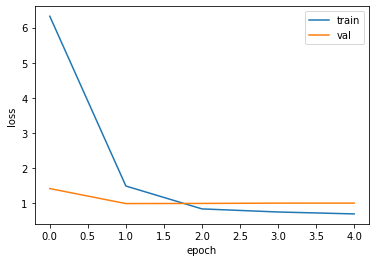

In [118]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [119]:
# model = keras.models.load_model("../Data/best_cnn_model_chairlaptop.h5")

In [120]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 1s 941ms/step - loss: 0.9954 - accuracy: 0.5517


[0.9954347014427185, 0.5517241358757019]

In [121]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 326ms/step - loss: 0.8302 - accuracy: 0.6944


[0.8301663994789124, 0.694444477558136]

In [ ]:
valData.shape

(20, 297, 231, 1)

In [28]:
# 이미지 확인하기 
plt.imshow(valData[0].reshape(297,231), cmap='gray_r')
plt.show()

NameError: name 'valData' is not defined

In [29]:
# 예측해보기 
pred = model.predict(valData[0:1])
print(pred)

NameError: name 'valData' is not defined

In [30]:
# 계단함수 
# - 예측치는 확률값으로 되어 있어서 계단 함수 통해 class 이름 반환받기 
import numpy as np 
classes = ['의자','랩탑'] # 계단만들기 

In [31]:
# np.argmax 통해 확률값 가장 높은 데이터 인덱스 가져와 몇번째 계단에 있는지 확인 
print(classes[np.argmax(pred)])

NameError: name 'pred' is not defined

### test data에 적용 

In [ ]:
from PIL import Image
import numpy as np
test = (Image.open("../Data/cnn/test.jpg"))

test = test.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘 
test = test.convert('L') # gray scale로 변환. 투명도가 있는 이미지의 경우 'LA'라고 쓴다. 
test.save("../Data/cnn/convert_test.jpg", 'JPEG')

test2 = (Image.open("../Data/cnn/test01.jpg"))
test2 = test2.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘 
test2 = test2.convert('L') # gray scale로 변환. 투명도가 있는 이미지의 경우 'LA'라고 쓴다. 
test2.save("../Data/cnn/convert_test01.jpg", 'JPEG')


/var/folders/t8/fgx0kt2j66zf6nrrj6v3_t9w0000gn/T/ipykernel_20490/3041188184.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  test = test.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘
/var/folders/t8/fgx0kt2j66zf6nrrj6v3_t9w0000gn/T/ipykernel_20490/3041188184.py:10: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  test2 = test2.resize((231, 297), resample = Image.LANCZOS) # 사이즈 바뀔 때 이미지 깨질 수 있어서 방지하는 알고리즘


In [ ]:
test = np.array(test)
test2 = np.array(test2)

In [ ]:
test.shape

(297, 231)

In [155]:
testData.shape

(24, 297, 231, 1)

In [156]:
print(model.predict(test.reshape(1,297,231,1)))
print(model.predict(test2.reshape(1,297,231,1)))

1/1 [==============================] - 0s 47ms/step
[[0.99999964 1.        ]]
1/1 [==============================] - 0s 12ms/step
[[0. 1.]]


In [157]:
model.evaluate(testData, testTarget)

1/1 [==============================] - 1s 538ms/step - loss: 0.1300 - accuracy: 0.9583


[0.1299687623977661, 0.9583333730697632]